Basic Array Review and Transformations

In [1]:
import matplotlib.pyplot as plt
import csv,gc
import matplotlib
import numpy as np
import nibabel as nb
import scipy.ndimage

%matplotlib inline
BINS = 32

In [69]:
z = np.random.uniform(0.0,10.0,(2,2))
print z

[[ 7.69567138  9.65480173]
 [ 0.38167205  3.96212413]]


In [70]:
print z[0]
print z[1]

[ 7.69567138  9.65480173]
[ 0.38167205  3.96212413]


In [80]:
zz, bin_edges = np.histogram(z)
print zz

histsum = zz.sum()
print histsum
print np.sum(zz*np.diff(bin_edges))
#Note: Shouldn't the array be [1010002]

[1 0 0 1 0 0 0 1 0 1]
4
3.70925186936


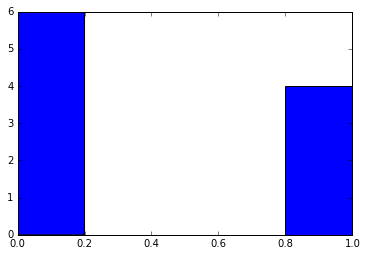

In [81]:
plt.hist(zz, bins='auto')
plt.show()

## We expect 6 zeros, 4 ones

In [82]:
zz, bin_edges = np.histogram(z,bins = 10)
print zz

[1 0 0 1 0 0 0 1 0 1]


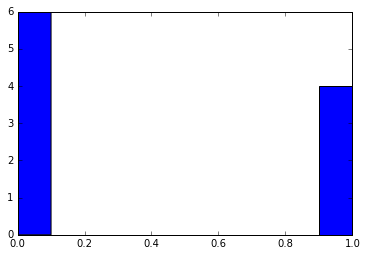

In [83]:
plt.hist(zz, bins = 10)
plt.show()

In [87]:
## Histogram Normalization
'''zhisteq = zz
zz.astype(float)
i=0
while i<7:
    zhisteq[i] = (zz[i]/histsum)
    i+=1
zhisteq.astype(float)
print zhisteq '''

zhisteq = zz*1.0/sum(zz)

<function matplotlib.pyplot.show>

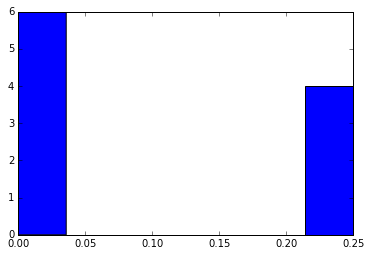

In [86]:
plt.hist(zhisteq, bins = 7)
plt.show

In [2]:
a = np.random.randint(0,10,(2,2,2)) 
print a

[[[5 9]
  [0 6]]

 [[2 1]
  [7 3]]]


In [9]:
print a[0]
print a[1]

[[5 9]
 [0 6]]
[[2 1]
 [7 3]]


In [37]:
aa = a.reshape(-1)
print aa
print aa.sum()

[5 9 0 6 2 1 7 3]
33


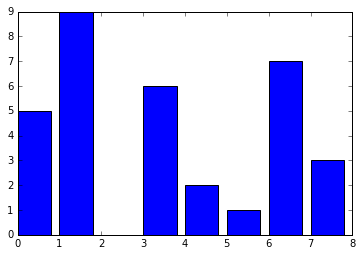

In [39]:
plt.bar(np.arange(aa.shape[0]),aa)
plt.show()

In [10]:
b = np.random.randint(0,10,(2,3,4)) 
print b

[[[4 1 7 8]
  [7 6 7 4]
  [9 9 2 3]]

 [[6 3 1 6]
  [3 4 0 4]
  [8 2 5 8]]]


In [18]:
print b[0]
print b[1]
print "---------"
print b[0,0]
print b[0,1]

[[4 1 7 8]
 [7 6 7 4]
 [9 9 2 3]]
[[6 3 1 6]
 [3 4 0 4]
 [8 2 5 8]]
---------
[4 1 7 8]
[7 6 7 4]


In [46]:
bb = b.reshape(-1)
print bb
print bb.sum()

[4 1 7 8 7 6 7 4 9 9 2 3 6 3 1 6 3 4 0 4 8 2 5 8]
117


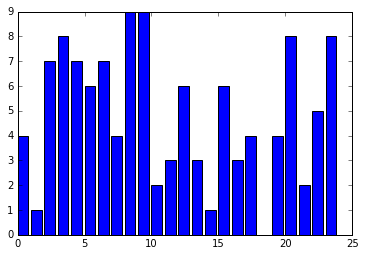

In [47]:
plt.bar(np.arange(bb.shape[0]),bb)
plt.show()